<a href="https://colab.research.google.com/github/VictorChavez07/Infraestruturas--AWS/blob/main/Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Repaso de SymPy**

SymPy es una librería de Python para matemáticas simbólicas. Pretende ser una alternativa a sistemas como Mathematica o Maple, manteniendo el código lo más simple posible y fácilmente extensible. SymPy está escrito completamente en Python y no requiere librerías externas.

La documentación de Sympy y los paquetes para la instalación se pueden encontrar en http://www.sympy.org/

Un resumen presentado en https://peerj.com/articles/cs-103.pdf

----------------------------------------------------------------------

SymPy define tres tipos numéricos: Real, Racional y Entero.

La clase Racional representa un número racional como un par de dos enteros: el numerador y el denominador, por lo que Racional(1, 2) representa 1/2, Racional(5, 2) 5/2 y así sucesivamente:

In [1]:
import sympy as sym
from IPython.display import *

a = sym.Rational(1,2)
a

1/2

In [2]:
a * 2

1

SymPy usa mpmath en segundo plano, lo que hace posible realizar cálculos usando aritmética de precisión arbitraria. De esa forma, algunas constantes especiales, como $e$, π, ∞ (Infinito), se tratan como símbolos y se pueden evaluar con precisión arbitraria:

In [3]:
sym.pi ** 2

pi**2

In [4]:
sym.pi.evalf()

3.14159265358979

In [5]:
(sym.pi + sym.exp(1)).evalf()

5.85987448204884

Como se puede observar, la función evalf evalúa la expresión como un número de punto flotante.

También hay una clase que representa el infinito matemático, llamada ∞:

In [6]:
sym.oo > 999999

True

In [7]:
sym.oo + 1

oo

**Ejercicios**



1.   Calcula $\sqrt 2$ con 100 decimales.
2.   Calcula $\frac 1 2$ + $\frac 1 3$ en aritmética racional.



In [69]:
## Solucion 1
y=(sym.sqrt(2)).evalf(100)
y

In [73]:
## Solucion 2
a=sym.Rational(1,2)
b=sym.Rational(1,3)
y=(a+b).evalf()
y

## Símbolos

A diferencia de otros sistemas de álgebra computacional, en SymPy debe declarar las variables simbólicas explícitamente:

In [8]:
x = sym.Symbol('x')
y = sym.Symbol('y')

Entonces pueden ser manipuladas:

In [9]:
x + y + x - y

2*x

In [10]:
(x + y) ** 2

(x + y)**2

Los símbolos ahora se pueden manipular usando algunos de los operadores de Python: +, -`, ``*, ** (aritmética), &, |, ~ , >>, << (booleano).

Sympy permite el control de la visualización de la salida. Desde aquí usamos la siguiente configuración para imprimir:

In [11]:
sym.init_printing(use_unicode=False, wrap_line=True)

## Manipulaciones Algebráicas

SymPy es capaz de realizar poderosas manipulaciones algebraicas. Echaremos un vistazo a algunos de los más utilizados: ampliar y simplificar.

**Ampliar**

Usa el siguiente código para expandir una expresión algebráica. Se intentará anidar potencias y multiplicaciones:

In [12]:
sym.expand((x + y) ** 3)

In [13]:
3 * x * y ** 2 + 3 * y * x ** 2 + x ** 3 + y ** 3

Se pueden dar más opciones en forma de palabras clave:

In [14]:
sym.expand(x + y, complex=True)

In [15]:
sym.I * sym.im(x) + sym.I * sym.im(y) + sym.re(x) + sym.re(y)

In [16]:
sym.expand(sym.cos(x + y), trig=True)

In [17]:
sym.cos(x) * sym.cos(y) - sym.sin(x) * sym.sin(y)

**Simplificar**

Use el siguiente código si desea transformar una expresión en una forma más simple:

In [18]:
sym.simplify((x + x * y) / x)

La simplificación es un término un poco vago, y existen alternativas más precisas para simplificar: powsimp (simplificación de exponentes), trigsimp (para expresiones trigonométricas), logcombine, radsimp, together.

**Ejercicios**


1.   Calcula la ampliación de $(x + y)^{6}$
2.   Simplifica la expresión trigonométrica $\frac{sin(x)}{\cos(x)}$



In [77]:
## Solucion 1
x = sym.Symbol('x')
y = sym.Symbol('y')
sol_1 =sym.expand(( x + y )**6)
sol_1



In [84]:
## Solucion 2
sol_2=sym.expand((sym.sin(x)/sym.cos(x)))
sol_2

## Cálculo

**Límites**

Los límites son fáciles de usar en SymPy, siguen la sintaxis limit(función, variable, punto), por lo que para calcular el límite de f(x) con x $\rightarrow$ 0, emitiría limit(f, x, 0):

In [19]:
sym.limit(sym.sin(x) / x, x, 0)

También puedes calcular el límite en el infinito:


In [20]:
sym.limit(x, x, sym.oo)

In [21]:
sym.limit(1 / x, x, sym.oo)

In [22]:
sym.limit(x ** x, x, 0)

**Derivación**

Se puede derivar cualquier expresión de SymPy usando diff(func, var).

In [23]:
sym.diff(sym.sin(x), x)

In [24]:
sym.diff(sym.sin(2 * x), x)

In [25]:
sym.diff(sym.tan(x), x)

Se puede comprobar que es correcto por

In [26]:
h = sym.Symbol('h')
sym.limit((sym.tan(x + h) - sym.tan(x)) / h, h, 0)

Las derivadas con mayor orden se pueden calcular utilizando el método diff(func, var, n):

In [27]:
sym.diff(sym.sin(2 * x), x, 1)

In [28]:
sym.diff(sym.sin(2 * x), x, 2)

In [29]:
sym.diff(sym.sin(2 * x), x, 3)

**Expansión de la serie**

SymPy también sabe cómo calcular la serie de Taylor de una expresión en un punto. Usar series(expr, var):

In [30]:
sym.series(sym.cos(x), x)

In [31]:
sym.series(1/sym.cos(x), x)

**Ejercicios**



1.   Calcula $\lim_{x \to 0} \frac{\sin x}{x}$.
2.   Calcula la derivada de $\log x$ respecto a $x$.



In [88]:
#solucion 1 
s_1=sym.limit ((sym.sin(x))/x ,x,0)
s_1


In [90]:
#solucion 2
s_2 =sym.diff(sym.log(x))
s_2

**Integrales**

SymPy tiene soporte para la integral indefinida y definitiva de funciones especiales y elementales trascendentales a través de la función de integrate(), que utiliza el poderoso algoritmo Risch-Norman extendido y algunas heurísticas y coincidencia de patrones. Se puede integrar funciones elementales:

In [32]:
sym.integrate(6 * x ** 5, x)

In [33]:
sym.integrate(sym.sin(x), x)

In [34]:
sym.integrate(sym.log(x), x)

In [35]:
sym.integrate(2 * x + sym.sinh(x), x)

También las funciones especiales se manejan fácilmente:

In [36]:
sym.integrate(sym.exp(-x ** 2) * sym.erf(x), x)

Es posible calcular la integral definida:

In [37]:
sym.integrate(x**3, (x, -1, 1))

In [38]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

In [39]:
sym.integrate(sym.cos(x), (x, -sym.pi / 2, sym.pi / 2))

También se admiten integrales impropias:

In [40]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

In [41]:
sym.integrate(sym.exp(-x ** 2), (x, -sym.oo, sym.oo))

**Resolución de Ecuaciones**

SymPy es capaz de resolver ecuaciones algebraicas, en una o más variables usando solveset():

In [42]:
sym.solveset(x ** 4 - 1, x)

Como se puede observar, toma como primer argumento una expresión que se supone que es igual a 0. También tiene soporte (limitado) para ecuaciones trascendentales:

In [43]:
sym.solveset(sym.exp(x) + 1, x)

*Sistemas de ecuaciones lineales*

Sympy es capaz de resolver una gran parte de ecuaciones polinómicas, y también es capaz de resolver múltiples ecuaciones con respecto a múltiples variables dando una tupla como segundo argumento. Para hacer esto, usa el comando solve():

-3 1
{x: -3/2, y: 2}


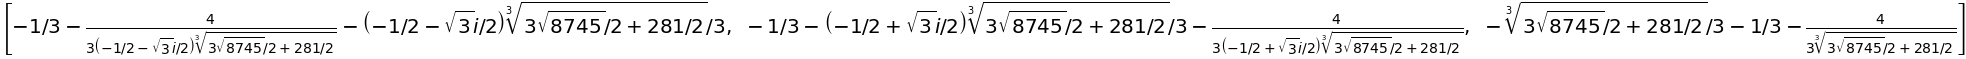

0.859833426594759 + 1.7139449867655*I


In [44]:
solution = sym.solve((x + 5 * y - 2, -3 * x + 6 * y - 15), (x, y))
print(solution[x], solution[y])
# otra forma de escribirlo
x,y=sym.symbols('x,y')
# definimos las ecuaciones lineales
eq1= 2*x+  y+1
eq2=-4*x-5*y+4
# solucionamos
solution=sym.solve((eq1,eq2),x,y)
print(solution)

raices=sym.solve(x**3+x**2-x+10)
display(raices)
print(raices[0].evalf())

Otra alternativa en el caso de las ecuaciones polinómicas es la función factor. Esta función devuelve el polinomio factorizado en términos irreducibles y es capaz de calcular la factorización en varios dominios:

In [45]:
f = x ** 4 - 3 * x ** 2 + 1
sym.factor(f)

In [46]:
sym.factor(f, modulus=5)

SymPy también es capaz de resolver ecuaciones booleanas, es decir, decidir si una determinada expresión booleana es satisfactoria o no. Para esto, usamos la función satisfiable:

In [47]:
sym.satisfiable(x & y)

{x: True, y: True}

Esto nos dice que (x & y) es verdadero siempre que x e y sean ambos verdaderos. Si una expresión no puede ser verdadera, es decir, ningún valor de sus argumentos puede hacer que la expresión sea verdadera, devolverá falso:

In [48]:
sym.satisfiable(x & ~x)

False

**Ejercicios**


1.  Resuelve el sitema de ecuación $x + y = 2$ , $2x + y = 0$
2.   ¿Hay valores booleanos x, y que hacen (~ x | y) & (~ y | x) sea verdadera?



In [96]:
#solucion 1 
resultado= sym.solve([x + y-2 ,2*x + y ],[x ,y])
resultado

In [97]:
#solucion 2
s2=sym.satisfiable((not(x) or y) & (not(y) or x ))
s2

{x: True, y: True}

## Álgebra lineal

**Matrices**

Las matrices se crean como instancias de la clase Matrix:

In [49]:
sym.Matrix([[1, 0], [0, 1]])

[1  0]
[    ]
[0  1]

A diferencia de una matriz NumPy, también puede poner Símbolos en ella:

In [50]:
A = sym.Matrix([[1, x], [y, 1]])
A

[1  x]
[    ]
[y  1]

In [51]:
A**2

[x*y + 1    2*x  ]
[                ]
[  2*y    x*y + 1]

**Ecuaciones diferenciales**

SymPy es capaz de resolver (algunos) ecuaciones diferenciales ordinarios. Para resolver ecuaciones diferenciales, utilice dsolve. Primero, cree una función indefinida pasando cls=Function a la función de símbolos:

In [52]:
f, g = sym.symbols('f g', cls=sym.Function)

f y g ahora son funciones indefinidas. Podemos llamar a f(x), y representará una función desconocida:

In [53]:
f(x)

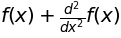

In [54]:
f(x).diff(x, x) + f(x)

In [55]:
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Se pueden dar argumentos de palabras clave a esta función para ayudar a encontrar el mejor sistema de resolución posible. Por ejemplo, si sabe que es una ecuación separable, puede usar la palabra clave hint='separable' para forzar a dsolve a resolverla como una ecuación separable:

In [56]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable') 

**Ejercicios**


1.   Resolver la ecuación diferencial de Bernoulli $x \frac{df(x)}{x} + f(x) - f(x)^{2}$
2.   Resuelve la misma ecuación usando hint='Bernoulli'. ¿Qué observas?



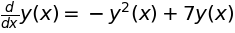

In [99]:
#solucion 1
# Resolviendo ecuación diferencial
# defino las incognitas
x = sym.Symbol('x')
y = sym.Function('y')

# expreso la ecuacion
f = 6*(y(x)) +(y(x)) - (y(x))**2
sym.Eq(y(x).diff(x), f)

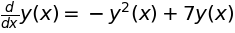

In [100]:
#solucion 2
# Resolviendo ecuación diferencial
# defino las incognitas
x = sym.Symbol('x')
y = sym.Function('y')

# expreso la ecuacion
f = 6*(y(x)) +(y(x)) - (y(x))**2
sym.Eq(y(x).diff(x), f,hint='Bernoulli')

**Graficos usando sympy**

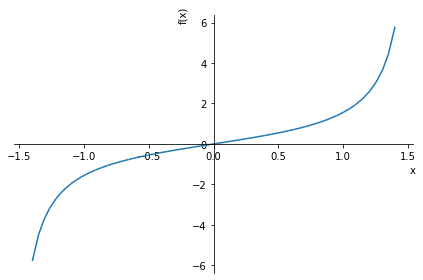

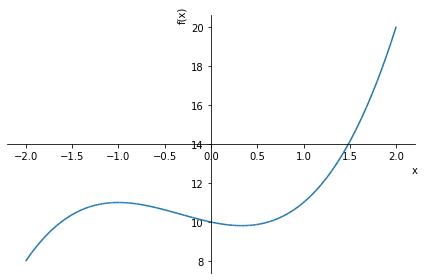

In [57]:
from sympy import plot,tan
x=sym.symbols('x')
plot(tan(x),(x,-1.4,1.4))

# con ecuaciones
eq=x**3+x**2-x+10
plot(eq,(x,-2,2))

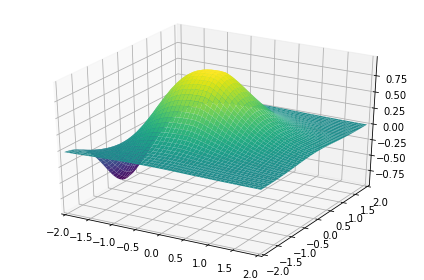

In [58]:
from sympy.plotting import plot3d
x,y=sym.symbols('x y')
plot3d((sym.exp(-(x**1.5+y**2))),(x,-2,2),(y,-2,2))

## Ejercicios



1.   Halla la función que devuelva la expresión $\frac{2}{5} e^{x^{2} - y} \cosh{(x + y)} + \frac{3}{7} \log{(xy + 1)} $ simbólicamente. Asegúrate de que las fracciones sigan siendo simbólicas.




2. Teniendo $Φ = \frac{1 + \sqrt{5}}{2}$. Usa SymPy para simplificar $F = \frac{Φ^{4} - Φ}{1 + Φ^{7}}$
3.   Resuelve el siguiente sistema de ecuaciones: \\ $x + y + z = 5$ \\ $2x + 4y + 3z = 2$ \\ $5x + 10y + 2z = 4$

4.   Sea f : R → R una función suave. Un punto crítico de f es un número $x_{0}$ ∈ R que satisface $f'(x_{0}) = 0$. El criterio de la segunda derivada establece que un punto crítico $x_{0}$ es un mínimo local de f si $f''(x0) > 0$, o un máximo local de f si $f''(x0) < 0$. Ahora considere el polinomio: \\
$\hspace{2cm}$ $p(x) = 2x^{6} - 51x^{4} + 48x^{3} + 312x^{2} + 576x - 100$  
Use SymPy para encontrar todos los puntos críticos de p y clasifique cada uno como un mínimo local o un máximo local. Grafique p(x) sobre x ∈ [−5, 5] y marque cada uno de los mínimos en un color y los máximos en otro color. Devuelve las colecciones de mínimos locales y máximos locales como conjuntos.
4.   Resuelve la siguiente ecuación diferencial: \\
$\hspace{2cm}$ $f(x) - 2 \frac{df(x)}{dx} + \frac{d^{2} f(x)}{dx^{2}} f(x) = \sin{x}$



In [ ]:
#solucion 5
# Resolviendo ecuación diferencial
# defino las incognitas
x = sym.Symbol('x')
y = sym.Function('y')

# expreso la ecuacion
f = (y(x)) -2*(y(x)) + (y(x))
sym.Eq(y(x).diff(x), f,hint='Bernoulli')